# Alpha-Beta-Pruning - Instruction

In [1]:
from IPython.display import Image, display

from algo_viz.alpha_beta_pruning import *
from algo_viz.utility import *
from algo_viz.tree_builder import *
from algo_viz.visualizer import *

## Basics

### Representation
We create a graph with a dictionary/map like this:

In [5]:
example_graph = {
    # 1. Layer
    'X': ['A', 'B'],  
    # 2. Layer
    'A': ['AA', 'AB'],  
    'B': ['BA', 'BB'],
    # 3. Layer
    'AA': ['AAA','AAB'],
    'AB': ['ABA','ABB'],
    'BA': ['BAA','BAB'],
    'BB': ['BBA','BBB'],  
    #4. Layer
    'AAA': 10,
    'AAB': 8,
    'ABA': 7,
    'ABB': 12,
    'BAA': 9,
    'BAB': 6,
    'BBA': 4,
    'BBB': 17,
}

### The algorithm
The method for the alpha-beta-pruning returns a dictionary with the done operation.

In [7]:
description = alpha_beta(example_graph)
print_pretty(description)

{ 
   AAA: {'value': 10, 'alpha': 0, 'beta': 0}
   AA: {'value': 10, 'alpha': 10, 'beta': inf}
   AAB: {'value': 8, 'alpha': 0, 'beta': 0}
   A: {'value': 10, 'alpha': -inf, 'beta': 10}
   ABA: {'value': 7, 'alpha': 0, 'beta': 0}
   AB: {'value': 12, 'alpha': 12, 'beta': 10}
   ABB: {'value': 12, 'alpha': 0, 'beta': 0}
   X: {'value': 10, 'alpha': 10, 'beta': inf}
   BAA: {'value': 9, 'alpha': 0, 'beta': 0}
   BA: {'value': 9, 'alpha': 10, 'beta': inf}
   BAB: {'value': 6, 'alpha': 0, 'beta': 0}
   B: {'value': 9, 'alpha': 10, 'beta': 9}
}


### Visualization
Now we can visualize the algorithm with the following method:

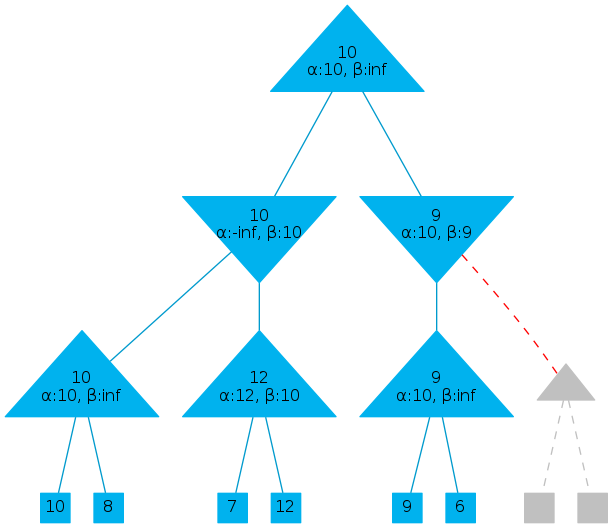

In [8]:
example_graph_viz = build_viz(example_graph.keys(), example_graph, description, branching=2)
example_graph_viz.render(filename='img/example_graph')
display(Image(filename='img/example_graph.png'))

###  Branching Factor
Other branching factors are possible too.

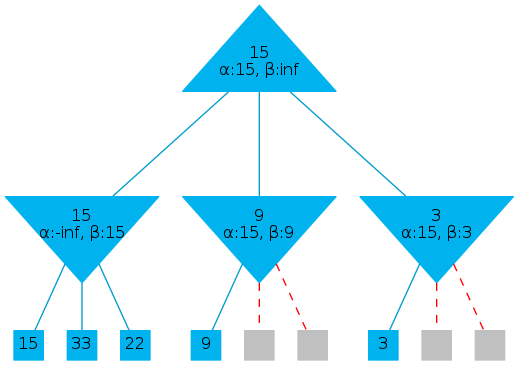

In [9]:
graph_b3 = {
     # 1. Layer
    'X': ['A', 'B', 'C'],  
    # 2. Layer
    'A': ['AA', 'AB', 'AC'],  
    'B': ['BA', 'BB', 'BC'],
    'C': ['CA', 'CB', 'CC'],
    # 3. Layer
    'AA': 15,
    'AB': 33,
    'AC': 22,
    'BA': 9,
    'BB': 4,
    'BC': 9,
    'CA': 3,
    'CB': 1,
    'CC': 2,   
}
desc = alpha_beta(graph_b3)
example_graph_b3_viz = build_viz(graph_b3.keys(), graph_b3, desc, branching=3)
example_graph_b3_viz.render(filename='img/graph_b3')
display(Image(filename='img/graph_b3.png'))

## Graph generation
Because creating manually graphs with a dictionary costs a lot of time, I have create a few helper methods. 

For generating a graph by the values of the leaf nodes.

In [10]:
order, generated_graph = build_graph([1, 2, 3, 4], branching=2)
print_pretty(generated_graph, order)

{ 
   X: ['X0', 'X1']
   X0: ['X00', 'X01']
   X1: ['X10', 'X11']
   X00: 1
   X01: 2
   X10: 3
   X11: 4
}


Or even one step further, generate a graph with random leaf node values.

In [11]:
nums = build_random_leafs(depth=2, branching=2)
order, generated_graph = build_graph(nums, branching=2)
print_pretty(generated_graph, order)

{ 
   X: ['X0', 'X1']
   X0: ['X00', 'X01']
   X1: ['X10', 'X11']
   X00: -63
   X01: -21
   X10: -97
   X11: 57
}
